# Análise de Sentimentos com Deep Learning

## Etapa 1 - Importação das Bibliotecas

#### math - operações matemáticas
#### re (regular expressions) - expressões regulares
#### BeautifulSoup - pré-processamento em textos
#### seaborn - visualização de graficos
#### spacy - biblioteca para processamento de linguagem natural (pré- processamento)
#### string - também para pré-processamento de texto
#### random - gerar números aleatorios
#### matplotlib - geração de gráficos
#### google.colab drive - ter acesso a recursos do google drive, acessar base de dados
#### zipfile - acesso e descompactação de arquivos .zip

In [1]:
import numpy as np
import math 
import re 
import pandas as pd
from bs4 import BeautifulSoup
#from google.colab import drive
#import zipfile
import seaborn as sns 
import spacy as sp 
import string
import random
import matplotlib.pyplot as plt

In [2]:
import tensorflow_datasets as tfds
import tensorflow as tf

# Etapa 2 - Pré-Processamento dos Dados

### Carregando e e abrindo o arquivo do conjunto de dados

In [3]:
#Como a base de dados não veio com o nome dos atributos, serão usado estes nomes como colunas.

cols = ['sentiment', 'id', 'date', 'query', 'user', 'text']

In [4]:
#abrindo a base de dados que está no formato .csv da pasta descompactada.
#header none significa que não se tem um cabeçalho, foi definida por names=cols

train_data = pd.read_csv('data/trainingandtestdata/train.csv', header = None,
                         names = cols, engine = 'python', encoding = 'latin1')
train_data

,sentiment,id,date,query,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
...,...,...,...,...,...,...
1599995,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599996,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599997,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599998,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...


In [5]:
#quantidade de registros , quantidade de atributos

train_data.shape

(1600000, 6)

In [6]:
#últimos registros

train_data.tail()

,sentiment,id,date,query,user,text
1599995,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599996,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599997,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599998,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...
1599999,4,2193602129,Tue Jun 16 08:40:50 PDT 2009,NO_QUERY,RyanTrevMorris,happy #charitytuesday @theNSPCC @SparksCharity...


In [7]:
#Sentiment é o atributo de classificação.
#Temos apenas duas classificações (0 e 4) que representam feliz e triste.

train_data.sentiment.unique()

array([0, 4], dtype=int64)

C:\Users\luizf\anaconda3\envs\python 37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


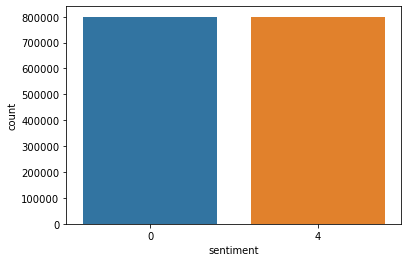

In [8]:
#Com esse gráfico de contagem, é possível ver que os registros estão extremamente equilibrados em relação a sua classificação.

sns.countplot(train_data.sentiment);

# Pré-Processamento 
### Limpeza dos dados

In [9]:
data = train_data
data

,sentiment,id,date,query,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
...,...,...,...,...,...,...
1599995,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599996,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599997,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599998,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...


In [10]:
#Realizando a retirada de atributos que não serão usados
#Como estamos trabalhando com NLP, ficaremos apenas com o texto e sua classificação, excluindo o resto.

data = data.drop(columns=['id', 'date', 'query', 'user'])
data

,sentiment,text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."
...,...,...
1599995,4,Just woke up. Having no school is the best fee...
1599996,4,TheWDB.com - Very cool to hear old Walt interv...
1599997,4,Are you ready for your MoJo Makeover? Ask me f...
1599998,4,Happy 38th Birthday to my boo of alll time!!! ...


In [11]:
#fazer a separação dos atributos preditores e classificação
#previsores = texto, classificação = sentimento
#usa o .values para transformar em numpy array pois precisa estar nesse formato para fazer o treinamento da rede neural

sentiment = data['sentiment'].values
text = data['text'].values

text

array(["@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D",
       "is upset that he can't update his Facebook by texting it... and might cry as a result  School today also. Blah!",
       '@Kenichan I dived many times for the ball. Managed to save 50%  The rest go out of bounds',
       ..., 'Are you ready for your MoJo Makeover? Ask me for details ',
       'Happy 38th Birthday to my boo of alll time!!! Tupac Amaru Shakur ',
       'happy #charitytuesday @theNSPCC @SparksCharity @SpeakingUpH4H '],
      dtype=object)

In [12]:
type(text)

numpy.ndarray

In [13]:
#Será separado uma parte dos registros para treino e teste
#Não será usado a base completa pois há 1.6 milhão de registro e demorará muito

from sklearn.model_selection import train_test_split

In [14]:
#Essa função geralmente divide a porcentagem que passa no test_size para as variaveis de teste, variaveis que estão representadas por _
#O que sobra é alocada nas variáveis de treino, que colocamos text e sentiment
#Como foi passado 75% para as de teste e está com _, apenas 25% será alocada nas variáveis que foram colocadas

text, _, sentiment, _ = train_test_split(text,sentiment, test_size= 0.90, stratify=sentiment)



In [15]:
#Tamanho após a redução para treinar mais rápido

text.shape

(160000,)

In [16]:
#stratify faz com que divida de forma semelhante em relação as classes para que não fique desbalanceado

unique,counts = np.unique(sentiment, return_counts=True)
unique, counts

#200 mil registros de cada classificação

(array([0, 4], dtype=int64), array([80000, 80000], dtype=int64))

# Função de Limpeza de texto usando expressões regulares

### + (Corresponde a uma ou mais ocorrências do padrão, encontradas à esquerda)
### * (Corresponde a 0 ou mais ocorrências do padrão, encontradas à esquerda)
### [^…] (Corresponde a qualquer caracter único fora dos colchetes)
### \d (Encontra dígitos [0-9])
### ? (Corresponde a 0 ou uma ocorrência do padrão, encontrada à esquerda) pode ou não acontecer
### [...] (Corresponde com qualquer caracter único nos colchetes e [^…] corresponde a qualquer caracter único fora dos colchetes)

In [17]:
def clean_text(text):
    text = BeautifulSoup(text, 'lxml').get_text()
    
    text = re.sub(r"@[A-Za-z0-9]+", " ", text) #substitui uma string que começa com @ seguida de qualquer caractere ou mais por um espaço
    text = re.sub(r"https?://[A-Za-z0-9./]+", " ", text)
    text = re.sub(r"[^A-Za-z.!?]+", " ", text) #substitui tudo aquilo que não for o que tem depois do ^ 
    text = re.sub(r" +", " ", text)
    
    return text

In [18]:
text1 = "@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D"
text1 = clean_text(text1)
print(text1)


 Awww that s a bummer. You shoulda got David Carr of Third Day to do it. D


# Pré Processamento Adicional com Spacy (Remoção de StopWords)

### A biblioteca Spacy possui um conjunto de stopwords para cada língua. Como estamos trabalhando com inglês, será usado este conjunto
### Para que o Spacy não se perca em nenhum ponto, o ideal é padronizar e deixar tudo minúsculo
### string.punctuation retorna um conjunto de pontuações mais usadas.
### Às vezes ao fazer o processamento, sobra algumas pontuações sozinhas, por isso, é bom retirá-las
### Para fazer o pré-processamento transformamos em lista para checar se está ou não dentro das stopwords. Com isso, o retorno também é uma lista com menos palavras. Porém, precisamos transformas em uma string novamente. Para isso, usamos o .join() na lista resultante

In [19]:
nlp = sp.load('en') #estamos trabalhando com ingles. Caso seja portuguès,usa 'pt'
nlp

In [20]:
#puxando as stopwords em inglês do Spacy
#mostrando todas as palavras na tela

stop_words = sp.lang.en.STOP_WORDS
print(stop_words)

{'hereupon', 'for', 'ca', 'enough', 'herein', 'and', 'ourselves', 'thence', 'three', 'do', 'too', 'made', 'from', 'seemed', 'various', 'were', 'becoming', 'hereby', 'at', 'sixty', 'others', 'have', 'above', 'hereafter', 'within', 'himself', 'really', 'those', 'where', 'against', 'whereby', "'ve", 'will', 'mine', 'beyond', 'what', 'already', 'even', 'former', 'together', 'i', 'whether', '’ll', 'whence', 'n‘t', 'used', 'whereupon', 'just', 'became', 'now', 'amount', 'nevertheless', 'up', 'move', 'one', 'would', 'by', 'my', "n't", 'been', 'rather', 'almost', 'sometimes', 'whenever', 'below', 'she', 'amongst', 'either', 'therefore', 'third', 'done', "'re", '‘d', 'along', 'side', 'beside', '‘re', 'their', 'still', 'also', 'yours', 'onto', 'neither', 'under', 'sometime', 'among', 'latterly', 'between', 'any', 'myself', 'besides', 'noone', 'to', 'then', 'as', 'keep', 'her', 'yourselves', 'may', "'ll", 'indeed', 'well', 'without', 'how', 'anyway', 'afterwards', 'perhaps', 'so', 'only', 'wherea

In [21]:
#outra função, parte dois da limpeza

def clean_text_sw(text):
    
    text = text.lower() #deixando tudo minusculo
    document = nlp(text) #toda vez que for fazer um processamento é preciso passar o texto e criar uma nova variavel que recebe o nlp. Coloca no formato para fazer o processamento
    words = []
    
    for token in document: #transformando em lista para separar cada palavra e depois checar se pertence as stopwords
        words.append(token.text)
    
    words = [word for word in words if word not in stop_words and word not in string.punctuation] #criando uma nova lista percorrendo cada palavra da lista anterior e adicionando a ela mesma apenas se não pertencer  list de SW
    words = ' '.join([str(element) for element in words]) #juntando numa string só dando um espaço entre cada elemento
    
    return words

In [22]:
clean_text_sw(text1)

'  awww s bummer shoulda got david carr day d'

## Aplicação das funções criadas na Base de Dados inteira

In [23]:
#Cada texto dentro de text é atribuido a old_text que por sua vez passa pelos pre processamentos e é atribuito a data_clean

data_clean = [clean_text_sw(clean_text(old_text)) for old_text in text]


In [24]:
#Fazendo a transformação das classes para ficar 0 e 1, pois será usada uma função de ativação sigmoid que retornara valores entre 0 e 1

data_labeled = sentiment

data_labeled[data_labeled == 4] = 1

data_labeled

array([1, 0, 0, ..., 0, 0, 1], dtype=int64)

## Tokenização

#### Processo de transformar as palavras em números, pois os modelos de machine learning trabalham com números
#### 1) Criar o Vocabulário
#### 2) Fazer a codificação de cada palavra para um valor
##### 2.1) Isto é feito com o tokenizer.enconde()

In [25]:
#Faz o vocabulário dado um corpus, ou seja, um conjunto de textos que é o nosso data_clean.
#O tamanho máximo do vocabulario é o que tem dizendo no vocab_size.

tokenizer = tfds.deprecated.text.SubwordTextEncoder.build_from_corpus(data_clean, target_vocab_size=2**16)

In [26]:
#exibindo todo o vocabulário obtido de todos os textos passados

print(tokenizer.subwords)

['  ', 's_', 'm_', 't_', ' ... ', 'good_', ' .. ', 'like_', 'got_', 'day_', 'going_', 'nt_', 'love_', 'don_', 'u_', 'work_', ' ...', 'time_', 'today_', 'know_', 'new_', 'll_', 'want_', 'think_', 'oh_', 'need_', 'lol_', 'thanks_', 'hope_', 'night_', 'home_', 've_', 'miss_', 'great_', 'feel_', ' .... ', 'd_', 'lol', 'wish_', 'twitter_', 'na_', 'day', 'morning_', 'getting_', 'gon_', 'today', 'happy_', 'watching_', 'bad_', 'haha_', 'sorry_', 'didn_', 'tomorrow_', 'come_', 'sad_', 'way_', 'nice_', ' ..', 'yeah_', 'fun_', 'sleep_', 'work', 'wait_', 'hey_', 'hate_', 'people_', 'n_', 'right_', 'bed_', 'better_', 'yes_', 'little_', 'long_', 'wanna_', 'school_', 'having_', 'tonight_', 'week_', 'thank_', 'best_', 'let_', 'working_', 'watch_', 'time', 'days_', 'feeling_', 'won_', 'awesome_', 'y_', 'ok_', 'look_', 'good', 'looking_', 'ready_', 'sure_', 'tomorrow', 'tired_', 'ur_', 'went_', 'night', 'r_', 'find_', 'trying_', 'thing_', 'pretty_', 'weekend_', 'life_', 'o_', 'e_', 'sick_', 'man_', 'may

In [27]:
#TOKENIZAÇÃO

data_inputs = [tokenizer.encode(sentence) for sentence in data_clean]
data_inputs

[[32, 9208, 19, 3, 2043],
 [39, 11, 22137, 23, 1300, 27695, 109, 7545, 31440],
 [54625, 4178, 2422, 4424, 3868],
 [1, 24353, 108, 167, 1150, 8396, 32, 4428, 271, 460, 2775],
 [2573, 34566, 894, 557, 300, 259, 6, 13, 72, 19258, 483, 15, 21, 851],
 [11, 12191, 4402, 7673],
 [407, 82, 3190, 5239],
 [480, 300, 391, 9672, 19484, 1246, 3681, 2176, 15652],
 [9, 3443, 1392, 38935, 89, 6125, 2514],
 [86, 23818, 48159, 54753, 19, 170, 4, 56, 3, 121, 2, 346],
 [1, 430, 40, 8577, 2864, 11562, 92],
 [1, 50, 52, 4, 20, 29490, 815, 2861, 91, 105, 3242, 49, 14677],
 [678, 9843],
 [174, 61, 342, 8, 24, 9, 443, 123, 3, 1859, 1409],
 [5463, 8, 1506],
 [1, 22835, 8479],
 [54753],
 [5275],
 [1, 59, 13, 10563],
 [65, 6972, 2, 4, 7578],
 [1,
  114,
  308,
  515,
  51,
  50,
  22,
  322,
  54842,
  54754,
  3,
  133,
  816,
  47580,
  2971,
  28178],
 [1, 159, 2132, 196, 4, 57, 298, 168],
 [1, 48043, 193, 335, 2751, 2715, 810, 127, 166],
 [1, 6, 289, 33, 35610, 5, 1238, 6, 3357],
 [1372, 157, 45466, 1726, 712

## Padding


#### Como o próprio nome já diz, tem que fazer o preenchimento.
#### Há textos com 2 palavras, há textos com 10... a ideia é preencher e fazer com que todos os textos tenham o mesmo tamanho
#### Como fazer?
#### Há uma função pronta do tensoflow pad_sequences(texto, o_que_vai_preencher,padding = 'post', maxlen = 64)

In [28]:
#verificando qual texto tem o maior número de palavras
#loop percorre o data_inputs e a cada verificação vê o tamanho, atribui a uma lista e vai pegar o valor máximo

max_len = max([len(sentence) for sentence in data_inputs])

In [29]:
#tamanho máximo

max_len

64

In [30]:
#PREENCHIMENTO
#Frases com poucas palavras, será preenchido com 0 à direita até a posição 64
#padding = 'post' significa que vai sendo adicionado sempre ao final

data_inputs = tf.keras.preprocessing.sequence.pad_sequences(data_inputs,
                                                            value = 0,
                                                            padding = 'post',
                                                            maxlen=64
                                                           )

In [31]:
#Agora cada registro tem 64 espaços com um valor diferente de 0 específico para uma palavra e 0 para o restante completando
print(data_inputs[1000])

[   1  102 3858 1820    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0]


## Divisão da base de dados (Treino/Teste)

#### Será usado o train_test_split() para fazer essa divisão usando 75% dos dados para treino e 25% para teste

In [32]:
#Divisão
#70% treino, 30% teste, stratify para fazer a divisão balanceada em relação às classes

train_inputs, test_inputs, train_labels, test_labels = train_test_split(data_inputs, 
                                                                         data_labeled,
                                                                         test_size = 0.3,
                                                                         stratify = data_labeled)

In [33]:
#Formato dos dados de treino
train_inputs.shape

(112000, 64)

In [34]:
#Mesma dimensão, é bom sempre verificar se tem o mesmo número

train_labels.shape

(112000,)

In [35]:
test_inputs.shape

(48000, 64)

In [36]:
test_labels.shape

(48000,)

C:\Users\luizf\anaconda3\envs\python 37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:ylabel='count'>

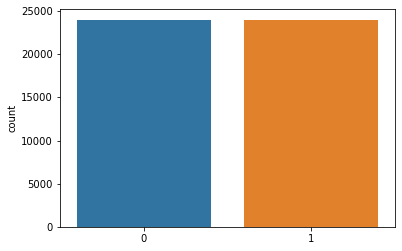

In [37]:
#Verificando se deu certo o balanceamento com Stratify

sns.countplot(test_labels)

# Construção do Modelo de Treinamento

### Será construído um modelo com base no que foi visto na teoria
### Camada de Convolução, Camada de MaxPooling e as Camadas Densas
## Parâmetros:
#### self: parâmetro padrão. Ao Criar uma instância da classe, ela vai se referir a um objeto e nao a propria classe
#### vocab_size: tamanho do vocabulário.
#### emb_dim: número de colunas da matriz de embeddings que vai servir de entrada após a tokenização e padding
#### nb_filters: número de filtros por dimensão. Foi visto que não é igual a imagem. Filtro pegando duas, três e quatro palavras por operação de convolução. Assim serão 50 filtros com cada um desses.
#### ffn_units: numero de neuronios na camada densa
#### nb_classes: número de classificações: positiva ou negativa.
#### dropout_rate: tecnica para evitar overfitting, vai zerar alguns neurônios.


### Em imagens usa o Conv2D mas como aqui são vetores, usa o Conv1D
### Não há aplicação de camada de flatteling pois já está em vetor.

In [39]:
class DCNN(tf.keras.Model): #Model classe base para se trabalhar com Redes Neurais
    
    #definição de construtor
    def __init__(self, 
                 vocab_size,
                 emb_dim = 128,
                 nb_filters=50,
                 ffn_units = 512,
                 nb_classes=2,
                 dropout_rate = 0.1,
                 training=False,
                 name="dcnn"):
        super(DCNN, self).__init__(name = name) #chamando o método construtor, criando um novo modelo desse tipo
        
        
        #DEFINIÇÃO DE CAMADAS
        
        #Camada de Embedding (Convolucional)
        
        self.embedding = layers.Embedding(vocab_size, emb_dim) #Construir a matriz de entrada - tamanho do vocabulario X numero de colunas embedding
        
        ##Camadas de Filtros (Conv)
        #Filtro de duas palavras (bigramas)
        self.bigram = layers.Conv1D(filter = nb_filters, kernel_size = 2, padding = 'same', activation='relu') #Padding = 'same' retorna os msm dados e evita perda de informação
        
        #Filtro de duas palavras (trigramas)
        self.trigram = layers.Conv1D(filter = nb_filters, kernel_size = 3, padding = 'same', activation='relu')
        
        #Filtro de duas palavras (quadrigrama)
        self.fourgram = layers.Conv1D(filter = nb_filters, kernel_size = 4, padding = 'same', activation='relu')
        
        #Camada de Pooling
        self.maxPool = layers.GlobalMaxPoollD()
        
        #Camada densa
        self.layers = layers.Dense(units = ffn_units, activation = 'relu')
        
        #Camada de dropout
        self.dropout = layers.Dropout(rate = dropout_rate) #Camada para ajudar a evitar o overfitting
        
        #Camada de saída
        
        #duas possibilidades. Se o numero de classes for dois, então só retornará 1 neurônio (uma das duas classes). Função de ativação sigmoid que é ótima para duas classes
                             #Se o numero for maior, então os neuronios será o numero de classes
        if nb_classes == 2:
            self.lastDense = layers.Dense(units = 1, activation = 'sigmoid')
        else:
            self.lastDense = layers.Dense(units = nb_classes, activation = 'softmax')